In [1]:
%matplotlib inline

import torch
import numpy as np
from torch import optim
import torchvision.utils
import torch.nn.functional as F
from torch.autograd import Variable
from torch.nn import CrossEntropyLoss
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,random_split

import config
from utils import imshow
from models import SiameseNetwork, CNN
from training import trainSiamese,inferenceSiamese, trainCNN
from datasets import SiameseNetworkDataset, CNNDataset
from loss_functions import ContrastiveLoss

# generate_csv(config.training_dir)

import os
if not os.path.exists('state_dict'):
    os.makedirs('state_dict')

## Training Siamese Network

In [2]:
# Split the dataset into train and validation sets
# siamese_dataset = SiameseNetworkDataset(config.compare_siamese_csv,
#                                         transform=transforms.Compose([
#                                             transforms.Resize((config.img_height,config.img_width)),
#                                             transforms.ToTensor(),
#                                             transforms.Normalize(0,1)]),
#                                         should_invert=False)

# num_train = round(0.9*siamese_dataset.__len__())
# num_validate = siamese_dataset.__len__()-num_train



# siamese_train, siamese_valid = random_split(siamese_dataset, [num_train,num_validate])

# siamese_train_dataloader = DataLoader(siamese_train,
#                         shuffle=True,
#                         num_workers=8,
#                         batch_size=config.train_batch_size)

# siamese_valid_dataloader = DataLoader(siamese_valid,
#                         shuffle=True,
#                         num_workers=8,
#                         batch_size=1)

# # Training
# netS = SiameseNetwork().cuda()
# criterionS = ContrastiveLoss()
# optimizer = optim.Adam(net.parameters(),lr = config.learning_rate )
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer,config.step_size, config.gamma)

# netS, train_loss_historyS, valid_loss_historyS,dict_nameS = trainSiamese(netS,criterionS,optimizer,scheduler,siamese_train_dataloader,
#              siamese_valid_dataloader,config.train_number_epochs,do_show=True)

## Train CNN with Cross Entropy Loss

In [3]:
cnn_dataset = CNNDataset(config.compare_cnn_csv,
                                        transform=transforms.Compose([
                                            transforms.Resize((config.img_height,config.img_width)),
                                            transforms.ToTensor(),
                                            transforms.Normalize(0,1)]),
                                        should_invert=False)

cnn_train_dataloader = DataLoader(cnn_dataset,
                        shuffle=True,
                        num_workers=8,
                        batch_size=config.train_batch_size)

netC = CNN().cuda()
criterionC = CrossEntropyLoss()
optimizer = optim.Adam(netC.parameters(),lr = config.learning_rate )
scheduler = torch.optim.lr_scheduler.StepLR(optimizer,config.step_size, config.gamma)

100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  3.39it/s]


Epoch-0	 Train loss: 1.1962


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.47it/s]


Epoch-1	 Train loss: 0.0379
new model saved


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.52it/s]


Epoch-2	 Train loss: 0.0273
new model saved


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.59it/s]


Epoch-3	 Train loss: 0.0173
new model saved


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.42it/s]


Epoch-4	 Train loss: 0.0008
new model saved


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.46it/s]


Epoch-5	 Train loss: 0.0002
new model saved


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.50it/s]


Epoch-6	 Train loss: 0.0010


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.56it/s]


Epoch-7	 Train loss: 0.0014


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.62it/s]


Epoch-8	 Train loss: 0.0001
new model saved


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.49it/s]


Epoch-9	 Train loss: 0.0000
new model saved


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.20it/s]


Epoch-10	 Train loss: 0.0000
new model saved


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.67it/s]


Epoch-11	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.45it/s]


Epoch-12	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.50it/s]


Epoch-13	 Train loss: 0.0001


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.46it/s]


Epoch-14	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.67it/s]


Epoch-15	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.50it/s]


Epoch-16	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.42it/s]


Epoch-17	 Train loss: 0.0000
new model saved


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.63it/s]


Epoch-18	 Train loss: 0.0002


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.21it/s]


Epoch-19	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.58it/s]


Epoch-20	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.74it/s]


Epoch-21	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.59it/s]


Epoch-22	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.70it/s]


Epoch-23	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.22it/s]


Epoch-24	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.72it/s]


Epoch-25	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.39it/s]


Epoch-26	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.65it/s]


Epoch-27	 Train loss: 0.0001


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.45it/s]


Epoch-28	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.66it/s]


Epoch-29	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.89it/s]


Epoch-30	 Train loss: 0.0000
new model saved


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.45it/s]


Epoch-31	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.56it/s]


Epoch-32	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.33it/s]


Epoch-33	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.59it/s]


Epoch-34	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.61it/s]


Epoch-35	 Train loss: 0.0000
new model saved


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.46it/s]


Epoch-36	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.68it/s]


Epoch-37	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.49it/s]


Epoch-38	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.52it/s]


Epoch-39	 Train loss: 0.0000
new model saved


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.28it/s]


Epoch-40	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.74it/s]


Epoch-41	 Train loss: 0.0001


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.51it/s]


Epoch-42	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.57it/s]


Epoch-43	 Train loss: 0.0001


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.35it/s]


Epoch-44	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.71it/s]


Epoch-45	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.42it/s]


Epoch-46	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.52it/s]


Epoch-47	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.17it/s]


Epoch-48	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.57it/s]


Epoch-49	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.27it/s]


Epoch-50	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.65it/s]


Epoch-51	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.60it/s]


Epoch-52	 Train loss: 0.0000
new model saved


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.67it/s]


Epoch-53	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.47it/s]


Epoch-54	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.57it/s]


Epoch-55	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.48it/s]


Epoch-56	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.58it/s]


Epoch-57	 Train loss: 0.0000


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.53it/s]


Epoch-58	 Train loss: 0.0000
new model saved


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  6.49it/s]


Epoch-59	 Train loss: 0.0000


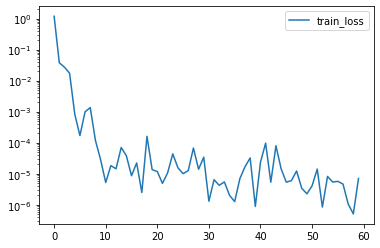

In [4]:
netC, train_loss_historyC, dict_nameC = trainCNN(netC,criterionC,optimizer,scheduler,cnn_train_dataloader,
             config.train_number_epochs,do_show=True)

In [5]:
# visualizing data

# vis_dataloader = DataLoader(cnn_train,
#                         shuffle=True,
#                         num_workers=1,
#                         batch_size=8)

# dataiter = iter(vis_dataloader)

# example_batch = next(dataiter)

# imshow(torchvision.utils.make_grid(example_batch[0]))
# print(example_batch[1])